In [132]:
import talib as ta
import numpy as np
import pandas as pd


In [133]:
df = pd.read_csv('DA000020.csv')

In [134]:
def visualize_plot(df,cols=None):
    plt.figure(figsize = (16,8))
    plt.bar(df['date'],height=df['diff'],width = 0.8,bottom=df['open'],color = df['color'])
    for col in cols:
        plt.plot(df['date'],df[col])
    plt.xticks([df['date'].iloc[0],df['date'].iloc[-1]])
    plt.show()

In [135]:
diff = df['close'] - df['open']
df['diff'] = diff
df['color'] = 'blue'
df = df.copy()

In [169]:
def get_color(df_):
    dif = df_['diff']
    for i in range(len(df_)):
        if dif.iloc[i] >= 0:
            df_['color'].iloc[i] = 'red'
        else:
            df_['color'].iloc[i]='blue'

In [137]:
get_color(df)
df

C:\Users\TJ\anaconda3-32bit\envs\trading\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,date,time,open,high,low,close,prev,volume,tr_amount,sales_qu,...,ad_pr_ratio,in_net_buy,up_do,up_do_ratio,deposit,st_turnover,tr_es_ratio,sign,diff,color
0,20201019,0,21350,22900,20750,21300,-250,583506,12608000000,271601,...,100.00,-1150,0,0.0,0,0.0,0.0,53,-50,blue
1,20201016,0,22750,22950,20750,21550,-1200,912125,19551000000,600960,...,100.00,-58544,0,0.0,0,0.0,0.0,53,-1200,blue
2,20201015,0,23850,23850,22450,22750,-1100,508031,11652000000,312005,...,100.00,329,0,0.0,0,0.0,0.0,53,-1100,blue
3,20201014,0,23900,24200,23600,23850,-450,420287,10026000000,231880,...,100.00,-2785,0,0.0,0,0.0,0.0,53,-50,blue
4,20201013,0,24200,24550,23900,24300,300,426678,10342000000,226866,...,100.00,-2650,0,0.0,0,0.0,0.0,50,100,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10942,19800109,0,5700,5740,5700,5700,410,190,0,0,...,6.59,0,0,0.0,0,0.0,0.0,32,0,red
10943,19800108,0,5290,5290,5290,5290,300,0,0,0,...,6.59,0,0,0.0,0,0.0,0.0,32,0,red
10944,19800107,0,4990,4990,4990,4990,290,120,0,0,...,6.59,0,0,0.0,0,0.0,0.0,32,0,red
10945,19800105,0,4700,4700,4700,4700,0,0,0,0,...,6.59,0,0,0.0,0,0.0,0.0,32,0,red


In [138]:
df['date'] = df['date'].astype('str')
df = df.iloc[:100,:].copy()
df.set_index(df['date'],inplace=True)

In [139]:
df.sort_index(ascending=True,inplace=True)

In [140]:
df

,date,time,open,high,low,close,prev,volume,tr_amount,sales_qu,...,ad_pr_ratio,in_net_buy,up_do,up_do_ratio,deposit,st_turnover,tr_es_ratio,sign,diff,color
date,,,,,,,,,,,,,,,,,,,,,
20200526,20200526,0,10400,10400,10050,10150,-150,250626,2544000000,140959,...,100.0,1806,0,0.0,0,0.0,0.0,53,-250,blue
20200527,20200527,0,10650,12450,10600,11300,1150,6795894,78614000000,3354240,...,100.0,10245,0,0.0,0,0.0,0.0,50,650,red
20200528,20200528,0,11350,11350,10450,10800,-500,1106251,12063000000,665363,...,100.0,4757,0,0.0,0,0.0,0.0,53,-550,blue
20200529,20200529,0,10900,12150,10850,11550,750,4470917,51931000000,2127166,...,100.0,34080,0,0.0,0,0.0,0.0,50,650,red
20200601,20200601,0,11750,11900,11450,11600,50,1547269,18069000000,817728,...,100.0,-14520,0,0.0,0,0.0,0.0,50,-150,blue
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20201013,20201013,0,24200,24550,23900,24300,300,426678,10342000000,226866,...,100.0,-2650,0,0.0,0,0.0,0.0,50,100,red
20201014,20201014,0,23900,24200,23600,23850,-450,420287,10026000000,231880,...,100.0,-2785,0,0.0,0,0.0,0.0,53,-50,blue
20201015,20201015,0,23850,23850,22450,22750,-1100,508031,11652000000,312005,...,100.0,329,0,0.0,0,0.0,0.0,53,-1100,blue


In [141]:
import matplotlib.pyplot as plt
%matplotlib inline

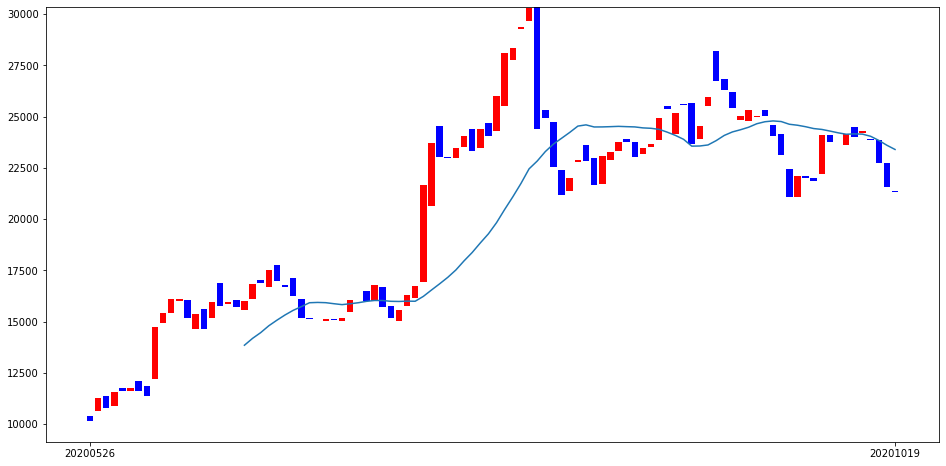

In [142]:
df['SMA'] = ta.SMA(df['close'],timeperiod = 20)
visualize_plot(df,cols=['SMA'])

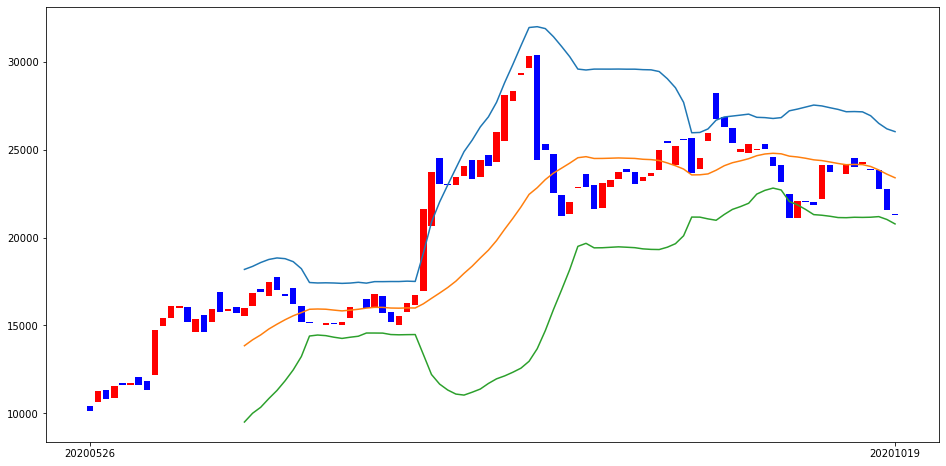

In [143]:
df['BBAND_UPPER'],df['BBAND_MIDDLE'],df['BBAND_LOWER'] = ta.BBANDS(df['close'],20,2)
visualize_plot(df,cols=['BBAND_UPPER','BBAND_MIDDLE','BBAND_LOWER'])

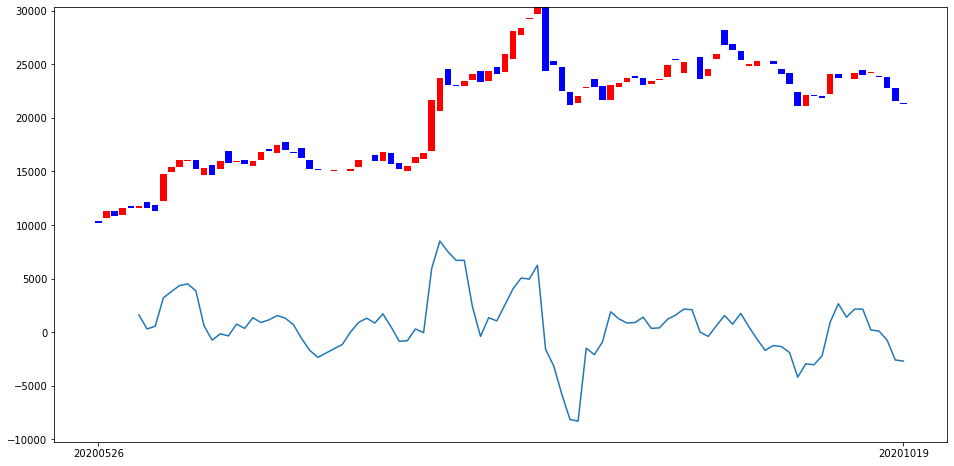

In [144]:
df['MOM_5'] = ta.MOM(df['close'],timeperiod=5)
visualize_plot(df,cols=['MOM_5'])

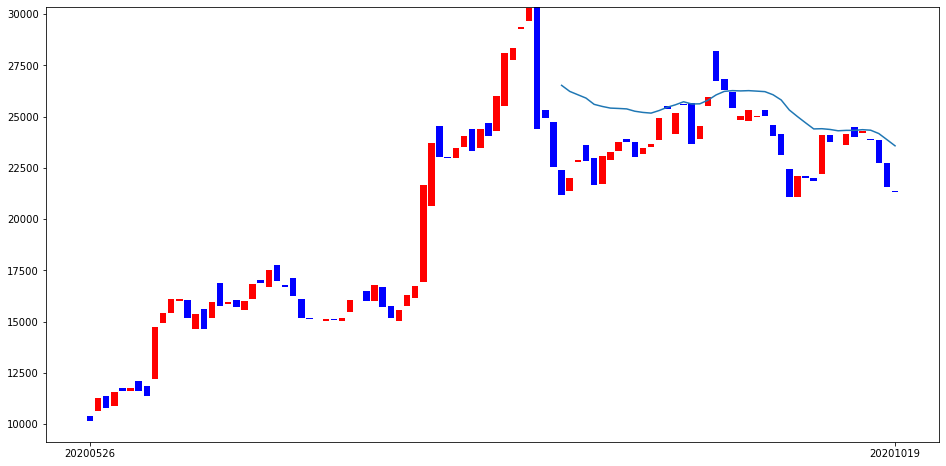

In [145]:
df['DEMA'] = ta.DEMA(df['close'])
visualize_plot(df,cols=['DEMA'])

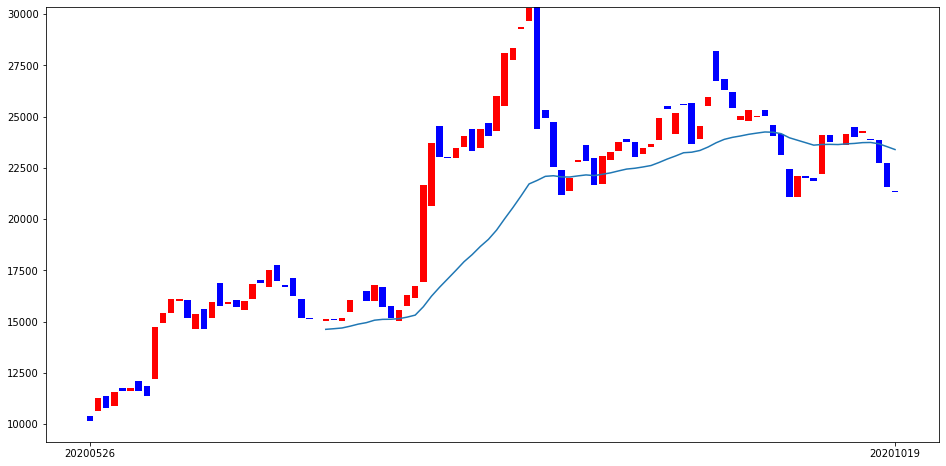

In [146]:
df['EMA'] = ta.EMA(df['close'])
visualize_plot(df,cols=['EMA'])

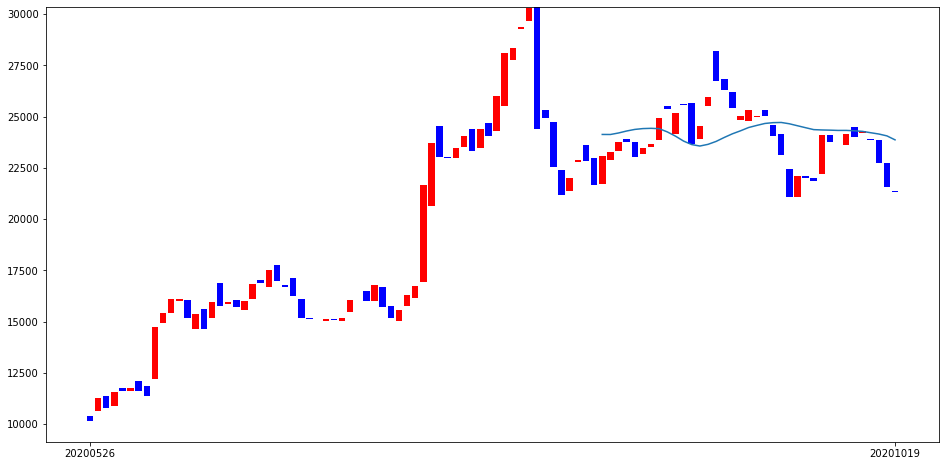

In [147]:
df['HT_TRENDLINE'] = ta.HT_TRENDLINE(df['close'])
visualize_plot(df,cols=['HT_TRENDLINE'])

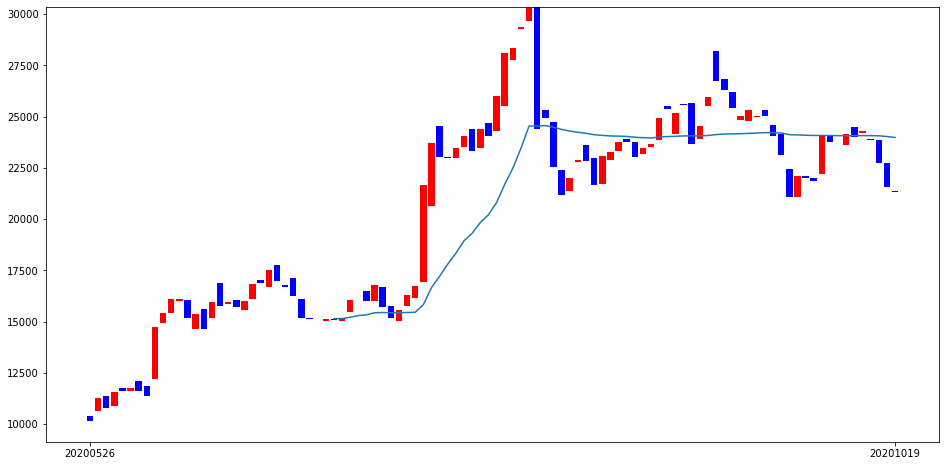

In [148]:
df['KAMA'] = ta.KAMA(df['close'])
visualize_plot(df,cols=['KAMA'])

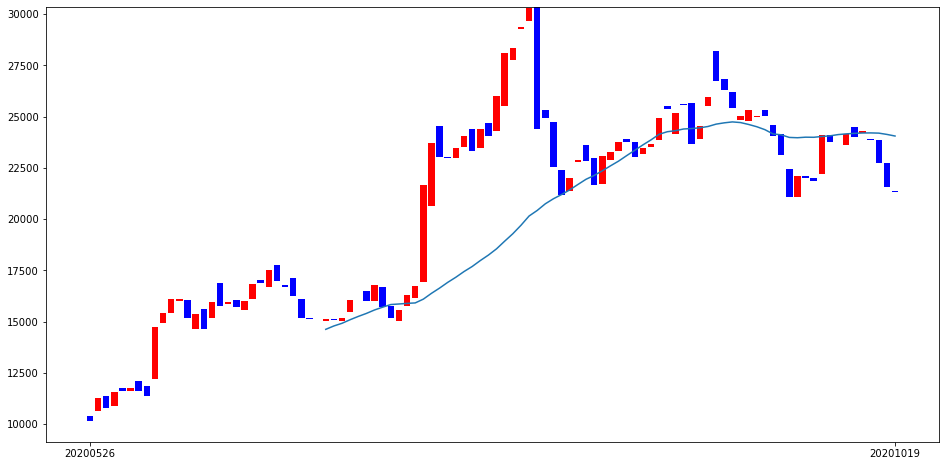

In [149]:
df['MA'] = ta.MA(df['close'])
visualize_plot(df,cols=['MA'])

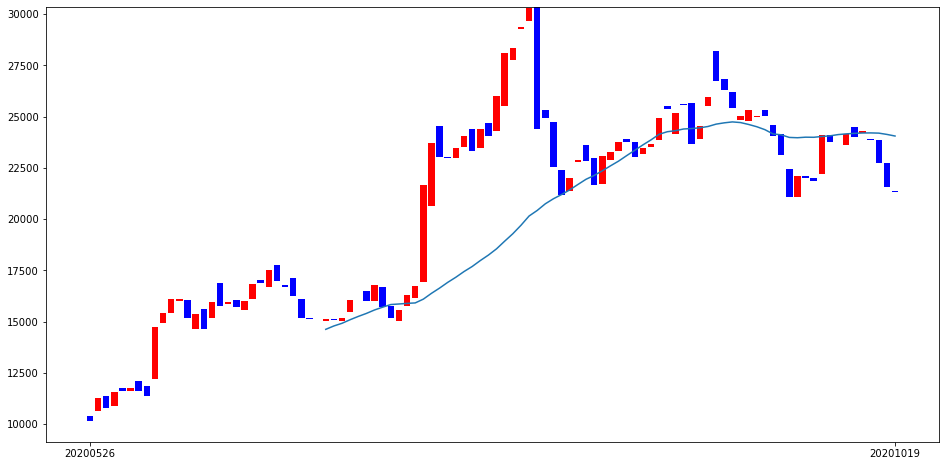

In [150]:
df['MA'] = ta.MA(df['close'])
visualize_plot(df,cols=['MA'])

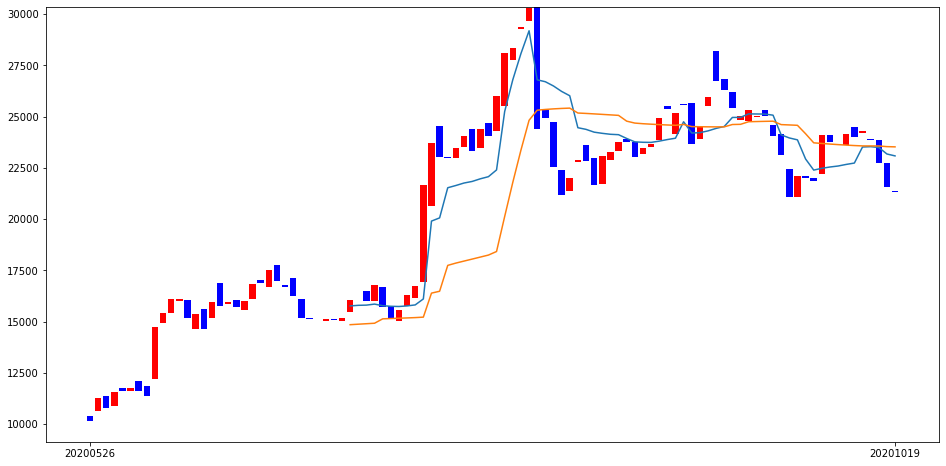

In [152]:
df['MAMA'],df['FAMA'] = ta.MAMA(df['close'])
visualize_plot(df,cols=['MAMA','FAMA'])

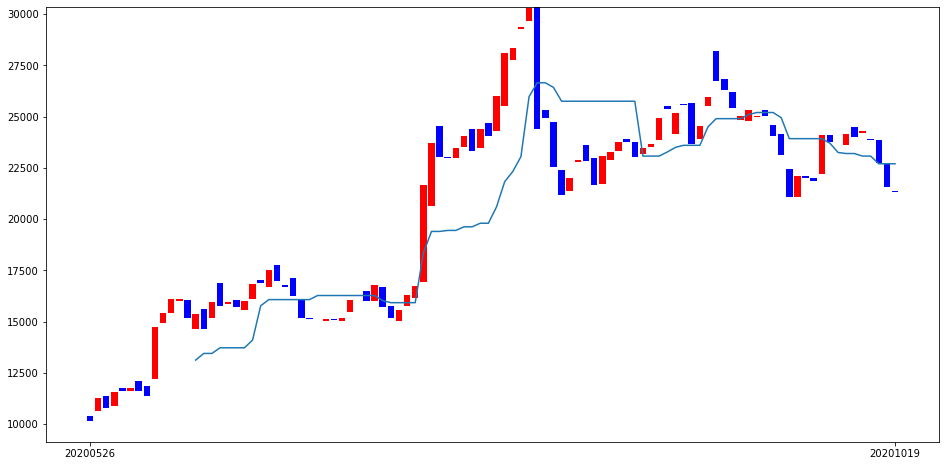

In [157]:
df['MIDPOINT'] = ta.MIDPOINT(df['close'])
visualize_plot(df,cols=['MIDPOINT'])

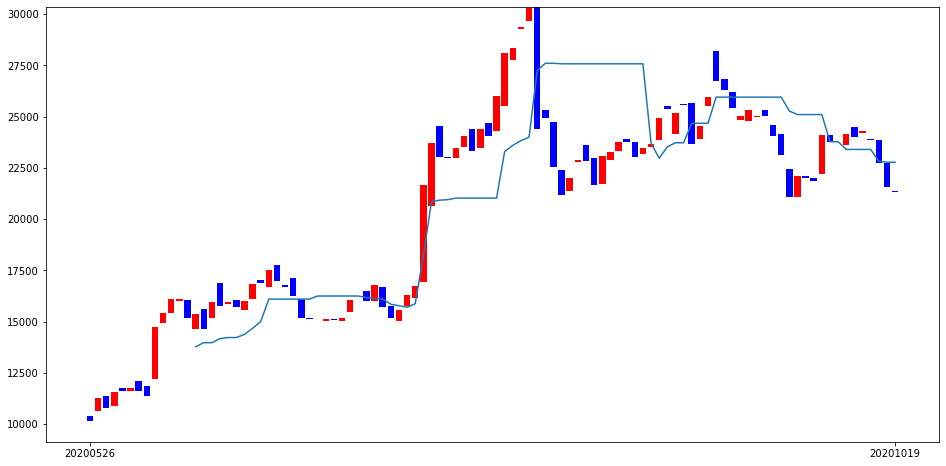

In [158]:
df['MIDPRICE'] = ta.MIDPRICE(df['high'],df['low'])
visualize_plot(df,cols=['MIDPRICE'])

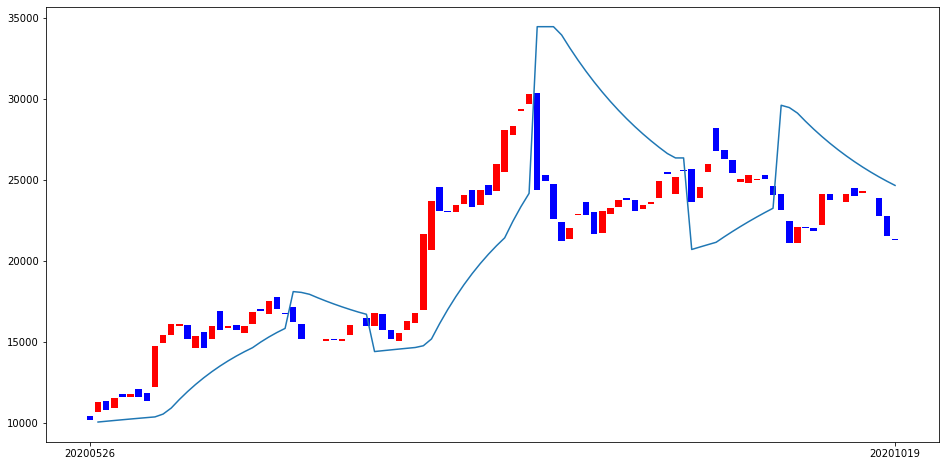

In [159]:
df['SAR'] = ta.SAR(df['high'],df['low'])
visualize_plot(df,cols=['SAR'])

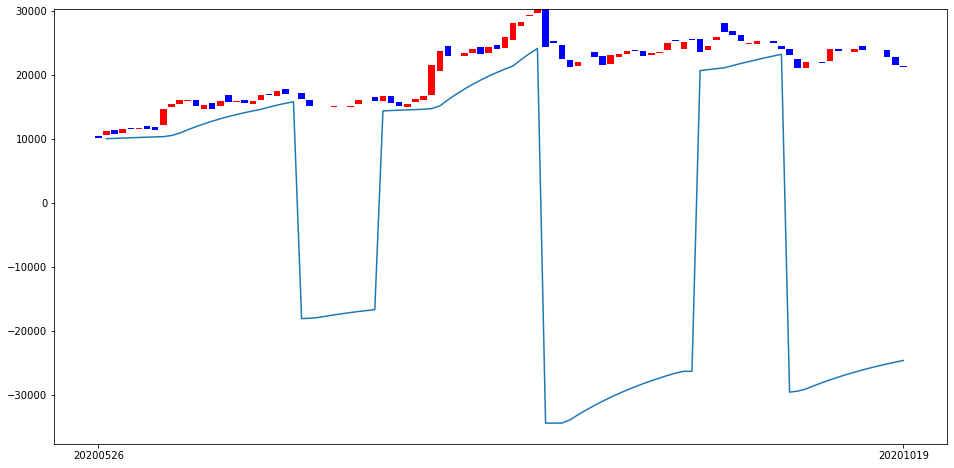

In [160]:
df['SAREXT'] = ta.SAREXT(df['high'],df['low'])
visualize_plot(df,cols=['SAREXT'])

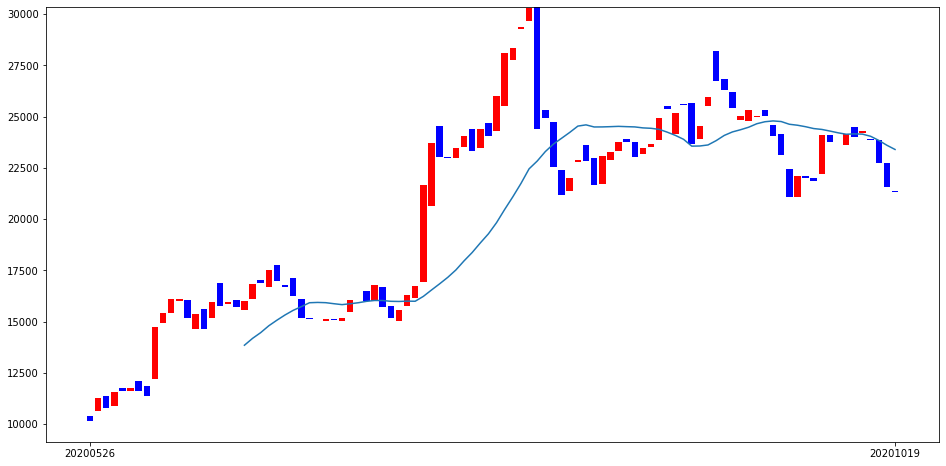

In [162]:
df['SMA'] = ta.SMA(df['close'],20)
visualize_plot(df,cols=['SMA'])

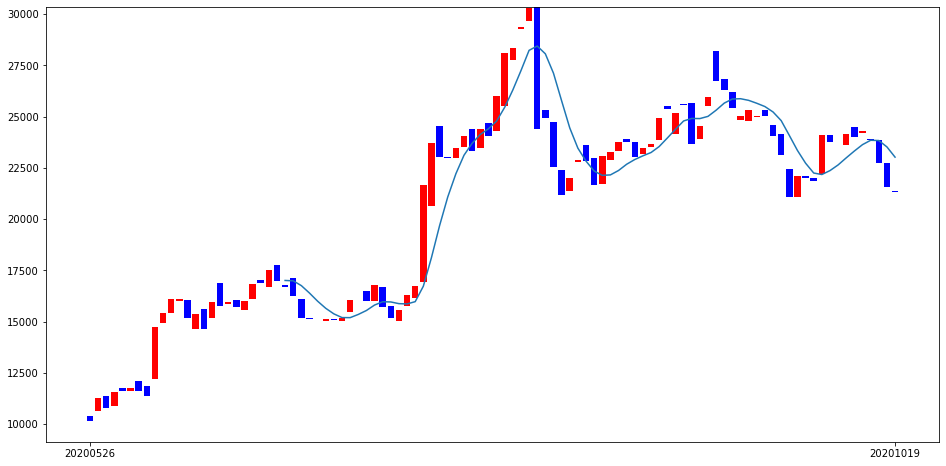

In [164]:
df['T3'] = ta.T3(df['close'])
visualize_plot(df,cols=['T3'])

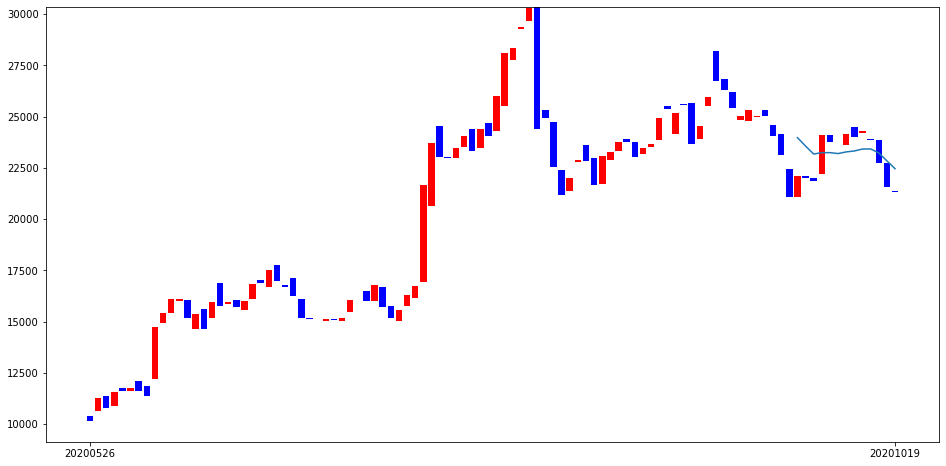

In [165]:
df['TEMA'] = ta.TEMA(df['close'])
visualize_plot(df,cols=['TEMA'])

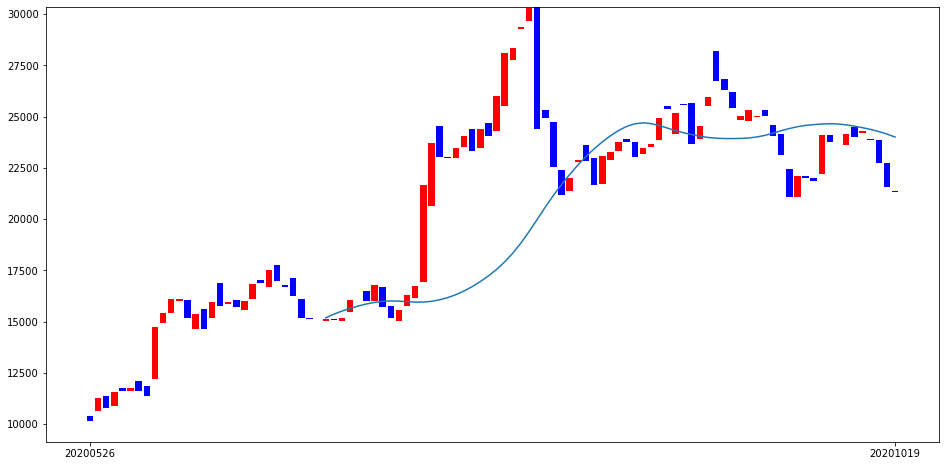

In [166]:
df['TRIMA'] = ta.TRIMA(df['close'])
visualize_plot(df,cols=['TRIMA'])

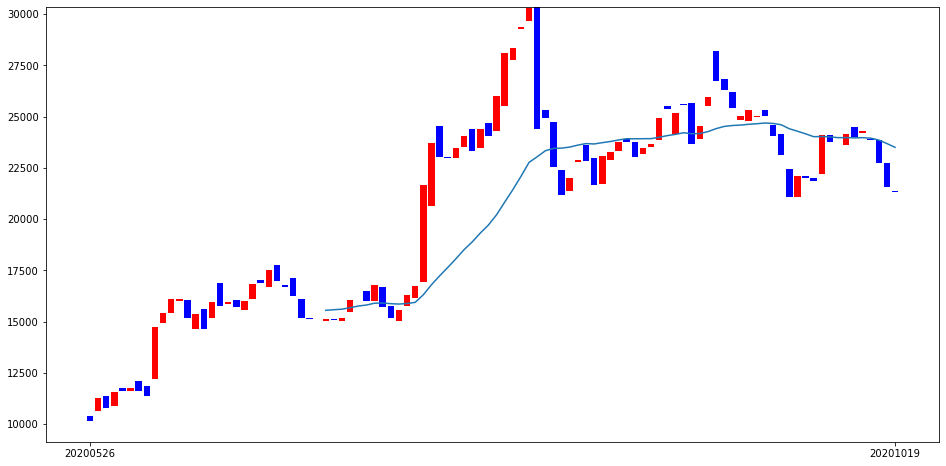

In [167]:
df['WMA'] = ta.WMA(df['close'])
visualize_plot(df,cols=['WMA'])

In [170]:
df = pd.read_csv('DA000020.csv')
diff = df['close'] - df['open']
df['diff'] = diff
df['color'] = 'blue'
df = df.copy()
get_color(df)
df['date'] = df['date'].astype('str')
df.set_index(df['date'],inplace=True)

C:\Users\TJ\anaconda3-32bit\envs\trading\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
df['BBAND_UPPER'],df['BBAND_MIDDLE'],df['BBAND_LOWER'] = ta.BBANDS(df['close'],20,2)
df['MOM_5'] = ta.MOM(df['close'],timeperiod=5)
df['DEMA'] = ta.DEMA(df['close'])
df['EMA'] = ta.EMA(df['close'])
df['HT_TRENDLINE'] = ta.HT_TRENDLINE(df['close'])
df['KAMA'] = ta.KAMA(df['close'])
df['MA'] = ta.MA(df['close'])
df['MAMA'],df['FAMA'] = ta.MAMA(df['close'])
df['MIDPOINT'] = ta.MIDPOINT(df['close'])
df['SAR'] = ta.SAR(df['high'],df['low'])